In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()


In [4]:
def get_section_results(file):
    steps = []
    eval_returns = []
    eval_stdRets = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Eval_AverageReturn':
                steps.append(e.step)
                eval_returns.append(v.simple_value)
            if v.tag == 'Eval_StdReturn':
                eval_stdRets.append(v.simple_value)
    data_np = np.vstack([steps, eval_returns, eval_stdRets]).T
    data_df = pd.DataFrame(data_np, columns=['step', 'Eval_AverageReturn', 'Eval_StdReturn'])
    return data_df


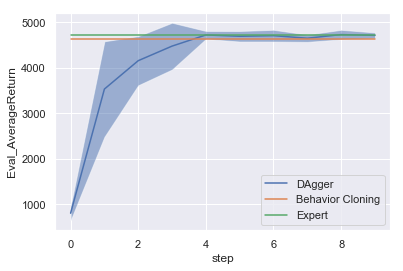

In [5]:
# 2.2
dagger_file = 'data/q2_dagger_ant_Ant-v2_13-09-2020_21-17-30/events.out.tfevents.1600057050.xuxindeMacBook-Pro.local'
df = get_section_results(dagger_file)
ax = sns.lineplot(x='step', y='Eval_AverageReturn', data=df)
ax.fill_between(df["step"], y1=df["Eval_AverageReturn"] - df["Eval_StdReturn"], y2=df["Eval_AverageReturn"] + df["Eval_StdReturn"], alpha=.5)

bc_file = 'data/q1_bc_ant_Ant-v2_10-09-2020_13-26-20/events.out.tfevents.1599769580.xuxindeMacBook-Pro.local'
df = get_section_results(bc_file)
plt.plot(np.ones(10)*df['Eval_AverageReturn'].to_numpy())
plt.plot(np.ones(10)*4714)
ax.legend(['DAgger', 'Behavior Cloning', 'Expert'])
# plt.title('Performance comparison of different policies on Ant-v2')

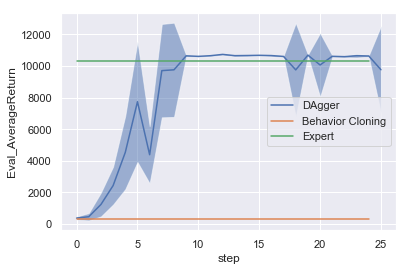

In [6]:
# 2.2
dagger_file = 'data/q2_dagger_humanoid_Humanoid-v2_14-09-2020_00-35-06/events.out.tfevents.1600068906.xuxindeMacBook-Pro.local'
df = get_section_results(dagger_file)
ax = sns.lineplot(x='step', y='Eval_AverageReturn', data=df)
ax.fill_between(df["step"], y1=df["Eval_AverageReturn"] - df["Eval_StdReturn"], y2=df["Eval_AverageReturn"] + df["Eval_StdReturn"], alpha=.5)

bc_file = 'data/q1_bc_humanoid_Humanoid-v2_11-09-2020_21-46-56/events.out.tfevents.1599886016.xuxindeMacBook-Pro.local'
df = get_section_results(bc_file)
plt.plot(np.ones(25)*df['Eval_AverageReturn'].to_numpy())
plt.plot(np.ones(25)*10345)
ax.legend(['DAgger', 'Behavior Cloning', 'Expert'])
# plt.title('Performance comparison of different policies on Ant-v2')

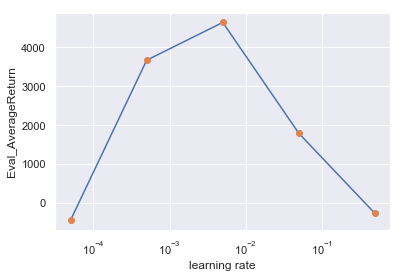

In [7]:
# 1.3
lrs = np.array([5e-1, 5e-2, 5e-3, 5e-4, 5e-5])
mean_rewards = np.array([-275.4, 1783, 4636, 3664, -447.9])
plt.plot(lrs, mean_rewards)
plt.plot(lrs, mean_rewards, 'o')
plt.xlabel('learning rate')
plt.ylabel('Eval_AverageReturn')
plt.xscale('log')
# plt.title('Influence of different learning rates on Eval_AverageReturn')